<a href="https://colab.research.google.com/github/kianatruong03/DataMiningFinalProject/blob/main/Loan_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Loan Eligiability Assessment Using Predictive Analytics

## Introduce the Goal


The goal of this project is to develop a predictive model that can assess loan eligibility based on an applicant's demographic, financial, and credit information. By analyzing patterns within the dataset, we aim to predict whether a loan application will be approved or rejected. Through data cleaning, feature engineering, and applying machine learning techniques, the project seeks to build an accurate and interpretable model that can assist financial institutions in making informed lending decisions.



## About the Data

The dataset used in this project consists of loan application records from a financial institution. Each record captures various attributes of a loan applicant, including personal information, financial details, credit history, and the final loan approval status. The training dataset contains labeled examples indicating whether each applicant was approved, while the test dataset contains similar features but without the target label.

Key features in the dataset include:

**Gender**: Applicant’s gender

**Married**: Marital status

**Dependents**: Number of dependents

**Education**: Education level (Graduate/Not Graduate)

**Self_Employed**: Employment status

**ApplicantIncome**: Income of the applicant

**CoapplicantIncome**: Income of the co-applicant

**LoanAmount**: Amount of the loan applied for

**Loan_Amount_Term**: Term of loan repayment

**Credit_History**: Credit history meets guidelines (1 = meets, 0 = doesn't meet)

**Property_Area**: Urban, Semiurban, or Rural area of the property

**Loan_Statu**s: (only in the training data) Target variable indicating loan approval (Y for approved, N for not approved)




In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import io
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.cluster import KMeans
from IPython.display import display, Math

train_url ='https://raw.githubusercontent.com/kianatruong03/DataMiningFinalProject/refs/heads/main/train_u6lujuX_CVtuZ9i.csv'
test_url ='https://raw.githubusercontent.com/kianatruong03/DataMiningFinalProject/refs/heads/main/test_Y3wMUE5_7gLdaTN.csv'

train_df = pd.read_csv(train_url)
test_df = pd.read_csv(test_url)

##Preprocessing

####Cleaning Data

Before we even start with creating our model and evaluating it we have to declare certain aspects that our model will need. We would need to import cetain sklearn models that will help us group certain features and clean any error found in our dataset. First we will check if any of our values have any nulls or errors and replace them with tangle values or remove them from the data altogether. We will also be initializing any relevant features and our target for modeling to help smooth things over once we implement them in our visualization.


In [ ]:
train_df.dtypes

,0
Loan_ID,object
Gender,object
Married,object
Dependents,object
Education,object
Self_Employed,object
ApplicantIncome,int64
CoapplicantIncome,float64
LoanAmount,float64
Loan_Amount_Term,float64


In [ ]:
#This allows us to look into if any of the categories have any missing or null values
#Our main focus is on Loan_Status, and since its false we dont need to clean it, but we will have to drop some columns or change the values for the others
train_df.isnull().any()

,0
Loan_ID,False
Gender,True
Married,True
Dependents,True
Education,False
Self_Employed,True
ApplicantIncome,False
CoapplicantIncome,False
LoanAmount,True
Loan_Amount_Term,True


In [ ]:
categorical_cols = ['Gender', "Married", "Dependents", "Self_Employed", "Credit_History"]
for col in categorical_cols:
  train_df[col].fillna(train_df[col].mode()[0], inplace=True)

numerical_cols = ['LoanAmount', 'Loan_Amount_Term']
for col in numerical_cols:
    train_df[col].fillna(train_df[col].median(), inplace=True)

<ipython-input-75-29c36d7d309f>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_df[col].fillna(train_df[col].mode()[0], inplace=True)
<ipython-input-75-29c36d7d309f>:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)

By making sure these values are filled in or removed it will help us with a better accuracy when predicting the accpetance of loans based on the clients infomation and features.

In [ ]:
print(train_df.isnull().any())

Loan_ID              False
Gender               False
Married              False
Dependents           False
Education            False
Self_Employed        False
ApplicantIncome      False
CoapplicantIncome    False
LoanAmount           False
Loan_Amount_Term     False
Credit_History       False
Property_Area        False
Loan_Status          False
dtype: bool


## Modeling

Since our analysis is based off **Logical
Regression** for **Classification** we have to understand the math behind classifification. This will help us look into the evaluation that our modeling is based off of. We want to be able to get the *recall* and *precision* to be as close as possible, but not too accurate that it can show that our data can be skewed. Based on the results we can use the KMeans clustering to explore hidden patterns in those groups of charcateristics because we removed replaced the missing values. We will also look into the modeing for what features factor in loan rejection the most. This can bring us insight on how to avoid these issues when we ourselves request a loan.


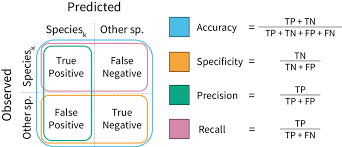

####Predicting Accuracy of Loan Decisions



In [ ]:
#Preprocessing
test_df['Loan_Status'] = 'placeholder'

combined_df = pd.concat([train_df, test_df], ignore_index=True)

for column in combined_df.columns:
    if combined_df[column].dtype == 'object':
        combined_df[column].fillna(combined_df[column].mode()[0], inplace=True)
    else:
        combined_df[column].fillna(combined_df[column].median(), inplace=True)

categorical_cols = combined_df.select_dtypes(include=['object']).columns
le = LabelEncoder()
for col in categorical_cols:
    combined_df[col] = combined_df[col].astype(str)
    combined_df[col] = le.fit_transform(combined_df[col])

placeholder_value = le.transform(['placeholder'])[0]
train_cleaned = combined_df[combined_df['Loan_Status'] != placeholder_value]
test_cleaned = combined_df[combined_df['Loan_Status'] == placeholder_value].drop(columns=['Loan_Status'])

#Modeling + Training
X = train_cleaned.drop(columns=['Loan_ID', 'Loan_Status'])
y = train_cleaned['Loan_Status'].astype(int)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
test_scaled = scaler.transform(test_cleaned.drop(columns=['Loan_ID']))

lr = LogisticRegression(max_iter=1000)
lr.fit(X_scaled, y)
y_pred = lr.predict(X_scaled)

#Evaluation
print("Classification Report:")
print(classification_report(y, y_pred))

kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(X_scaled)
train_cleaned.loc[:, 'Cluster'] = clusters

print("\nClustered Data Sample:")
print(train_cleaned[['Loan_ID', 'Cluster']].head())

Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.44      0.59       192
           1       0.79      0.98      0.88       422

    accuracy                           0.81       614
   macro avg       0.86      0.71      0.74       614
weighted avg       0.83      0.81      0.79       614


Clustered Data Sample:
   Loan_ID  Cluster
0        0        2
1        1        1
2        2        0
3        3        1
4        4        2


<ipython-input-77-145dd429fde0>:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  combined_df[column].fillna(combined_df[column].mode()[0], inplace=True)
<ipython-input-77-145dd429fde0>:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, 

#### Understaning Features that have Highest Loan Rejections



In this section of modeling, we will be lookign at what features correlate the most that causes loans being rejected to clients. We will be looking at their Income and LoanAmount with the categorical fatures like gender, married, dependents, education, employment, and property_area. In the visualization we will which will be approved(Green) and rejected(red) based on those catergories.

<ipython-input-78-9a9f2c3c79e4>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_cleaned['Loan_Status'] = y.values
<ipython-input-78-9a9f2c3c79e4>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_cleaned['Loan_Status_Label'] = train_cleaned['Loan_Status'].map({1: 'Approved', 0: 'Rejected'})


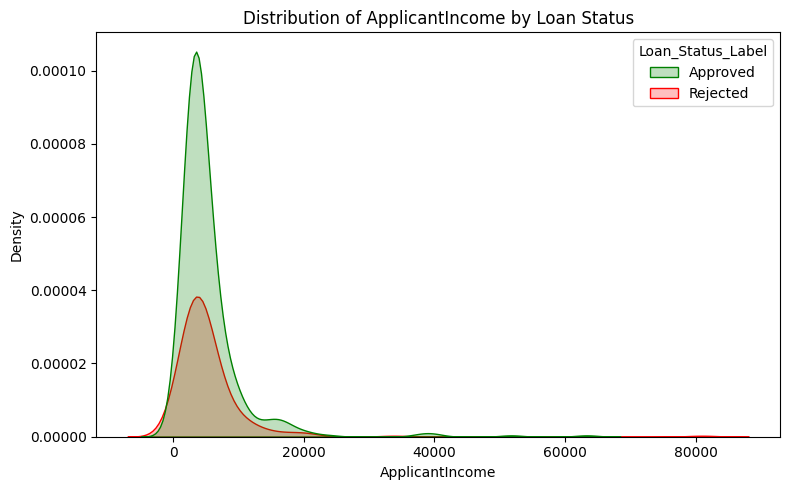

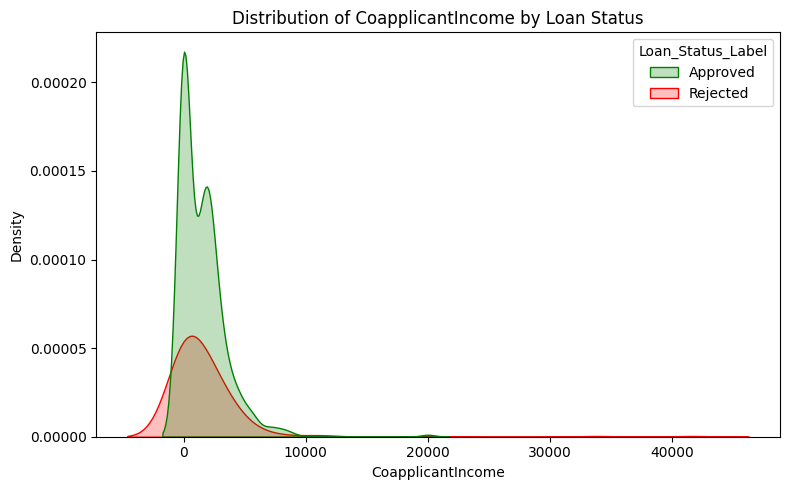

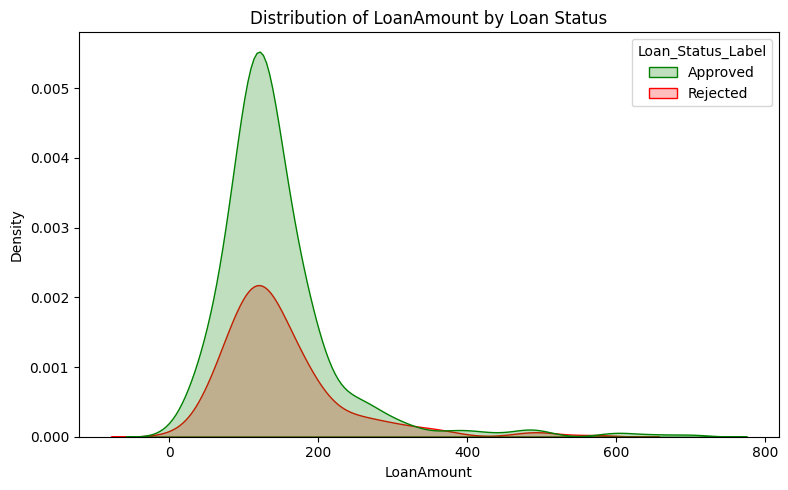

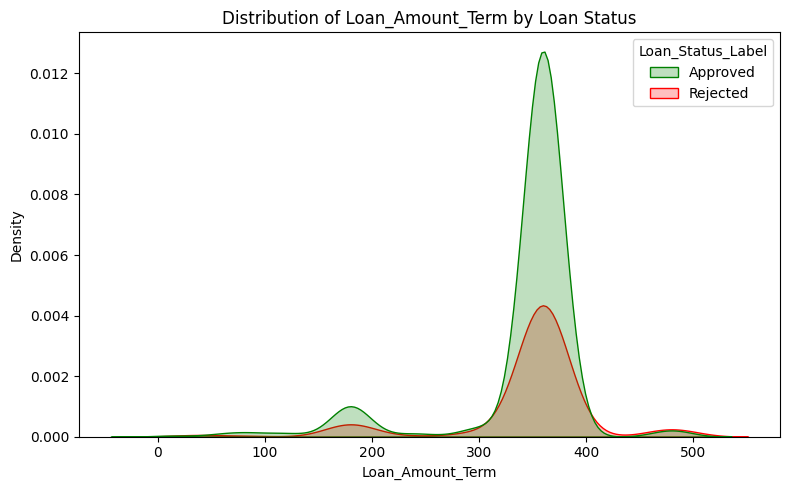

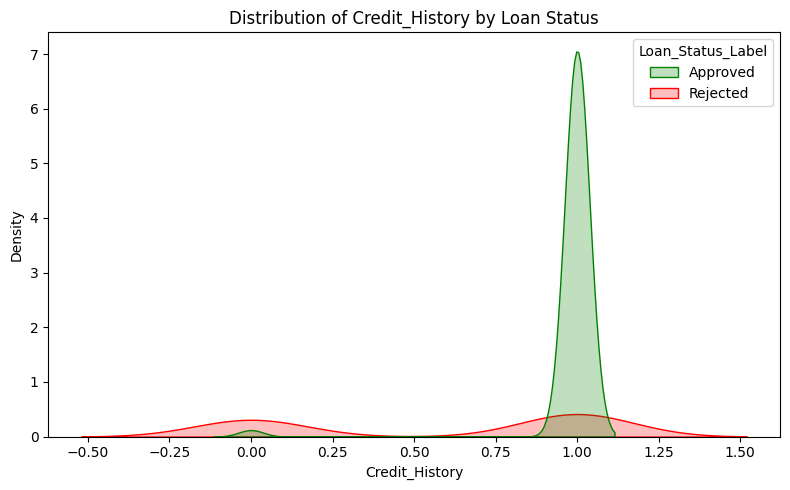

<ipython-input-78-9a9f2c3c79e4>:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_cleaned['Gender'] = train_cleaned['Gender'].map(gender_mapping)
<ipython-input-78-9a9f2c3c79e4>:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_cleaned['Married'] = train_cleaned['Married'].map(married_mapping)
<ipython-input-78-9a9f2c3c79e4>:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in t

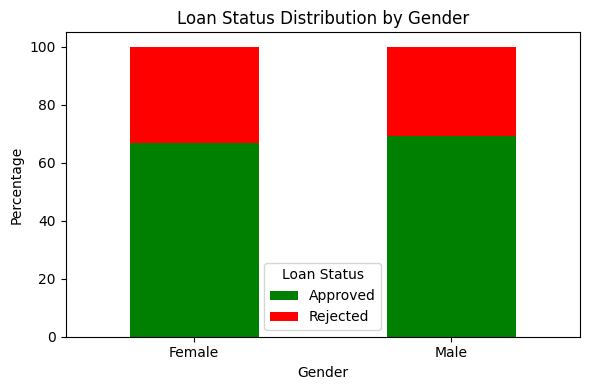

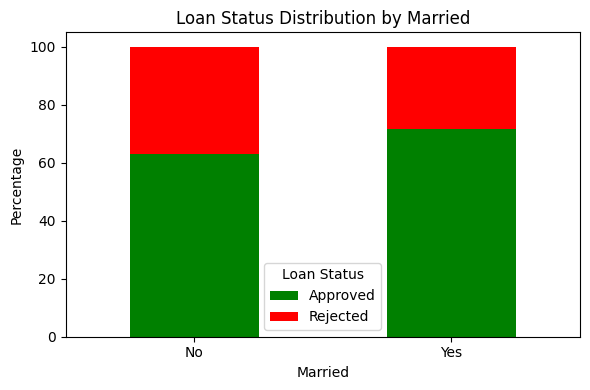

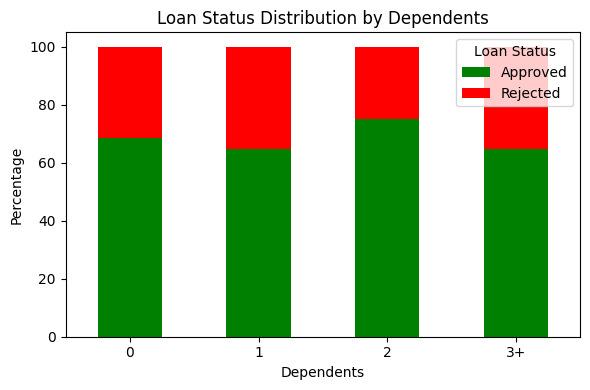

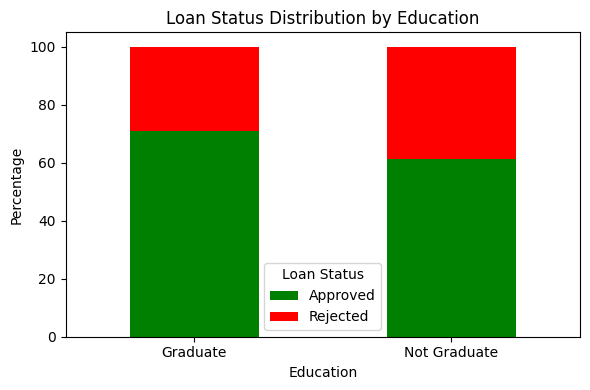

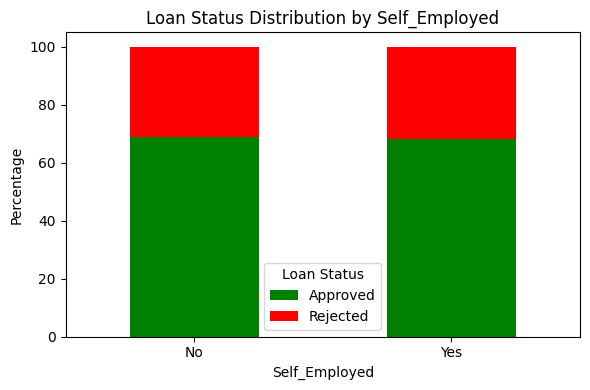

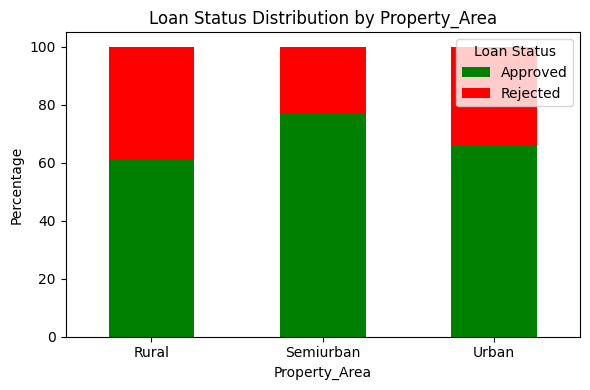

In [ ]:
# Cleaning Loan_Status
train_cleaned['Loan_Status'] = y.values
train_cleaned['Loan_Status_Label'] = train_cleaned['Loan_Status'].map({1: 'Approved', 0: 'Rejected'})

# List of key numeric features to compare
num_features = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History']

# Plot numeric features distribution
for feature in num_features:
    plt.figure(figsize=(8, 5))
    sns.kdeplot(data=train_cleaned, x=feature, hue='Loan_Status_Label', fill=True, palette=['green', 'red'])
    plt.title(f'Distribution of {feature} by Loan Status')
    plt.tight_layout()
    plt.show()

# List of key categorical features (already encoded but we’ll interpret the labels)
cat_features = ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area']

# Mapping dictionaries
gender_mapping = {0: 'Female', 1: 'Male'}
married_mapping = {0: 'No', 1: 'Yes'}
dependents_mapping = {0: '0', 1: '1', 2: '2', 3: '3+'}
education_mapping = {0: 'Graduate', 1: 'Not Graduate'}
self_employed_mapping = {0: 'No', 1: 'Yes'}
property_area_mapping = {0: 'Rural', 1: 'Semiurban', 2: 'Urban'}

# Apply mappings
train_cleaned['Gender'] = train_cleaned['Gender'].map(gender_mapping)
train_cleaned['Married'] = train_cleaned['Married'].map(married_mapping)
train_cleaned['Dependents'] = train_cleaned['Dependents'].map(dependents_mapping)
train_cleaned['Education'] = train_cleaned['Education'].map(education_mapping)
train_cleaned['Self_Employed'] = train_cleaned['Self_Employed'].map(self_employed_mapping)
train_cleaned['Property_Area'] = train_cleaned['Property_Area'].map(property_area_mapping)


# Plot bar charts for rejection rate by categorical features
for feature in cat_features:
    plt.figure(figsize=(6, 4))
    cross_tab = pd.crosstab(train_cleaned[feature], train_cleaned['Loan_Status_Label'], normalize='index') * 100
    cross_tab.plot(kind='bar', stacked=True, color=['green', 'red'], ax=plt.gca())
    plt.title(f'Loan Status Distribution by {feature}')
    plt.ylabel('Percentage')
    plt.xticks(rotation=0)
    plt.tight_layout()
    plt.legend(title='Loan Status')
    plt.show()

## Evaluation

####Predicting Accuracy of Loan Decisions

When we look at the confusion matrix we are able to see that we have an **Accuracy: 0.81** this showcases that it has quiet a high rate of predicting the correct amount of loans being accepted or rejected. Something to note is that while the precision has a rate of **0.92** for rejected loans its recall with a **0.44** for missed rejections is pretty poor. Based on the model we can see that it preforms better on approved loans compared to rejected due to the imbalance of *422 vs 192* cases. There can be improvements based on how we wight the balance of each of these features or finding certain skewed features in the LoanAmount. Another thing we can look at is if the null/missing values that we removed could have contributed to its rate of recalling the predicted amount of rejections correctly. This might be because tehre were multiple categories we were looking at that we may have inputed that could have not have any value or was a neutral stance but because we are using 1 and 0, it has to be one or the other.

####Understaning Features that have Highest Loan Rejections

In the visualizations we see from different categories of ways they can be rejected for a loan, we notice that there can be variations of why they get rejected. We can see that people that are not married tend to be rejected more compare to those that are, this can be based on what loans you are trying to get like a mortgage where they need another person to co-sign. It is amother thing that deending on the amount of dependents you have you can get rejected compare to others like somehow two dependents get less rejections compare to 1 dependent. Surprisingly, the status of self-employment has increase or decrease and what gender you are with a 75% acceptance rate.

## Storytelling and Conclusion

Our goal for this project was to predict loan approvals based on applicants' financial and personal information. By cleaning the data, processing relevant features, and applying predictive modeling; we were able to develop a reliable model that met our initial objectives. Along the way, we learned important insights into the most influential factors leading loan decisions, such as credit history, income levels, and property area. It was especially interesting to observe that even simple models could achieve strong results when the feature selection was thoughtful and targeted toward real world patterns. This project tells a broader story about the importance of financial transparency and stability in credit markets, and how data science can uncover underlying biases or reinforce fair decision making processes.

While we successfully built a model that predicts loan approval outcomes with good accuracy, we also recognized several opportunities for possible future improvement. For instance, incorporating external data like credit scores or employment history could further strengthen predictive performance. Additionally, exploring ensemble techniques or tuning hyperparameters more extensively might yield even higher accuracy. Critical thinking throughout this process emphasized that no model is ever truly complete. There are always new ways to expand, refine, and adapt based on the evolving landscape of available data and business needs.

Through this project, we learned how impactful thorough data preprocessing and feature engineering are in building successful machine learning models. Even relatively straightforward algorithms, when supported by clean and well understood data, can yield strong predictive performance. We also learned that understanding the business context behind a dataset, not just treating it as numbers, is critical for crafting models that are both accurate and meaningful. Ultimately, we achieved our goal of creating a functional loan prediction model, but we also opened the door to deeper questions about fairness and model deployment. Moving forward, continued iteration and validation would be key steps to ensure that predictive models like this one remain robust and ethically sound over time.

## Impact

The impact of this project has both social and ethical consequences. On the positive side, building a predictive loan approval model has the potential to streamline the loan process for banks and reduce human biases during decision making. Automated predictions could help standardize approvals based on objective financial factors, which could potentially increase fairness and speed up access to financial resources for qualified applicants. This could be particularly valuable for marginalized groups who historically faced discrimination in financial lending. If deployed responsibly, models like this could promote broader financial inclusion and support economic mobility for individuals who meet fair criteria.


However, there are also some serious ethical concerns that must be addressed: machine learning models are only as unbiased as the data that they are trained on. For example, approving fewer loans for applicants from certain backgrounds, the model could unintentionally reinforce systemic inequalities. Additionally, over reliance on automated decisions might limit applicants’ ability to explain unique circumstances that do not fit into easily quantifiable categories. Future implementations of this project should include continuous auditing for fairness, transparency in the decision making criteria process , and the opportunity for human oversight to ensure the model serves as a tool for greater equity rather than entrenching existing disparities.


## Refrences



1. https://www.kaggle.com/datasets/altruistdelhite04/loan-prediction-problem-dataset?resource=download
2. https://github.com/kianatruong03/DataMiningFinalProject
